<a href="https://colab.research.google.com/github/codehacker4655/ML-with-theory-inform-of-comments-/blob/main/Regression(all).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline

In [ ]:
dataset=pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1)#header tells which should be the columns and which should be the data points

In [ ]:
dataset

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [ ]:
dataset.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,246,245,245,245,245,245,245,245,245,245,245,245,245,244
unique,33,5,2,20,63,19,40,174,167,199,107,175,128,9
top,01,07,2012,35,55,14,0,88.9,7.9,8,1.1,3,0.4,fire
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [ ]:
##data cleaning process
dataset.isnull().sum()

,0
day,0
month,1
year,1
Temperature,1
RH,1
Ws,1
Rain,1
FFMC,1
DMC,1
DC,1


In [ ]:
dataset[dataset['BUI'].isnull()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dataset[dataset.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [ ]:
#the dataset is converted into two sets based on region from 122th index. we can make a new column based on the region
#1.bejaia region dataset
#2sidi-bel region

In [ ]:
#the dataset is converted into two sets based on region from 122th index. we can make a new column based on the region
#1.bejaia region dataset
#2sidi-bel region

# Create the 'region' column first
dataset['region'] = np.nan

for i in range(0,122):
  dataset.loc[i,'region']=0 # Bejaia region

for i in range(122,len(dataset)):
  dataset.loc[i,'region']=1 # Sidi-Bel Abbes region

In [ ]:
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  region       246 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.0+ KB


In [ ]:
##dataset.loc[:122,"region"]=0

In [ ]:
##dataset.loc[:122,"region"]=0 so here for the first 122 rows the value will be zero and if column doesn't exist , it will create the column
##iloc will be only position based and loc will be only label wise

In [ ]:
df=dataset

In [ ]:
df['region']=df['region'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
 14  region       246 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 29.0+ KB


In [ ]:
df.isnull().sum()

,0
day,0
month,1
year,1
Temperature,1
RH,1
Ws,1
Rain,1
FFMC,1
DMC,1
DC,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
 14  region       246 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 29.0+ KB


In [ ]:
df.shape

(246, 15)

In [ ]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'region'],
      dtype='object')

In [ ]:
for col in df.columns:
  df[col][122]=np.nan

/tmp/ipython-input-1588606291.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[col][122]=np.nan
/tmp/ipython-input-1588606291.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the cav

In [ ]:
df.isnull().sum()

,0
day,1
month,1
year,1
Temperature,1
RH,1
Ws,1
Rain,1
FFMC,1
DMC,1
DC,1


In [ ]:
df.dropna().reset_index(drop=True)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1.0
240,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1.0
241,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1.0
242,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0


In [ ]:
df.isnull().sum()

,0
day,1
month,1
year,1
Temperature,1
RH,1
Ws,1
Rain,1
FFMC,1
DMC,1
DC,1


In [ ]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df=df.drop(123).reset_index(drop=True)

In [ ]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1.0
241,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1.0
242,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1.0
243,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0


In [ ]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    object 
 1   month        244 non-null    object 
 2   year         244 non-null    object 
 3   Temperature  244 non-null    object 
 4    RH          244 non-null    object 
 5    Ws          244 non-null    object 
 6   Rain         244 non-null    object 
 7   FFMC         244 non-null    object 
 8   DMC          244 non-null    object 
 9   DC           244 non-null    object 
 10  ISI          244 non-null    object 
 11  BUI          244 non-null    object 
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
 14  region       244 non-null    float64
dtypes: float64(1), object(14)
memory usage: 28.8+ KB


In [ ]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'region'],
      dtype='object')

In [ ]:
## fix spaces in column names
df.columns=df.columns.str.strip()

In [ ]:
df.isnull().sum()

,0
day,1
month,1
year,1
Temperature,1
RH,1
Ws,1
Rain,1
FFMC,1
DMC,1
DC,1


In [ ]:
df[df['Classes'].isnull()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,1.0


In [ ]:
df.dropna().reset_index(drop=True)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1.0
239,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1.0
240,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1.0
241,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0


In [ ]:
df=df.drop(122).reset_index(drop=True)

In [ ]:
df[['month','day','year','Temperature','RH','Ws']]=df[['month','day','year','Temperature','RH','Ws']].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    object 
 7   FFMC         244 non-null    object 
 8   DMC          244 non-null    object 
 9   DC           244 non-null    object 
 10  ISI          244 non-null    object 
 11  BUI          244 non-null    object 
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
 14  region       244 non-null    float64
dtypes: float64(1), int64(6), object(8)
memory usage: 28.7+ KB


In [ ]:
df['Rain']=df['Rain'].astype(float)

In [ ]:
df.iloc[121:126]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
121,30,9,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,0.0
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1.0
123,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire,1.0
124,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire,1.0
125,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1,not fire,1.0


In [ ]:
for i in df['DC']:
  if (i=='14.6 9'):
    print(i)

14.6 9


In [ ]:
df[df['DC']=='14.6 9']

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
165,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,1.0


In [ ]:
df=df.drop(165).reset_index(drop=True)

In [ ]:
##changint the other columns to float datatypes
objects=[feature for feature in df.columns if df[feature].dtype=='object']


In [ ]:
objects

['FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [ ]:
for i in objects:
  if (i!='Classes'):
    df[i]=df[i].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  region       243 non-null    float64
dtypes: float64(8), int64(6), object(1)
memory usage: 28.6+ KB


In [ ]:
df=df.drop(166).reset_index(drop=True)

In [ ]:
#leys save the cleanded dataset
df.to_csv('cleaned2.csv',index=False)

In [ ]:
df1=df

In [ ]:
df1=df.drop(['day','month','year'],axis=1)

In [ ]:
df1['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [ ]:
df1['Classes']=np.where(df1['Classes'].str.contains('not fire'),0,1)

In [ ]:
#synatax for np.where(condition,value_if_true,value_if_false)
#contains check whether string is present or not

In [ ]:
df1['Classes'].value_counts()

,count
Classes,
1,136
0,106


In [ ]:
df1.shape

(242, 12)

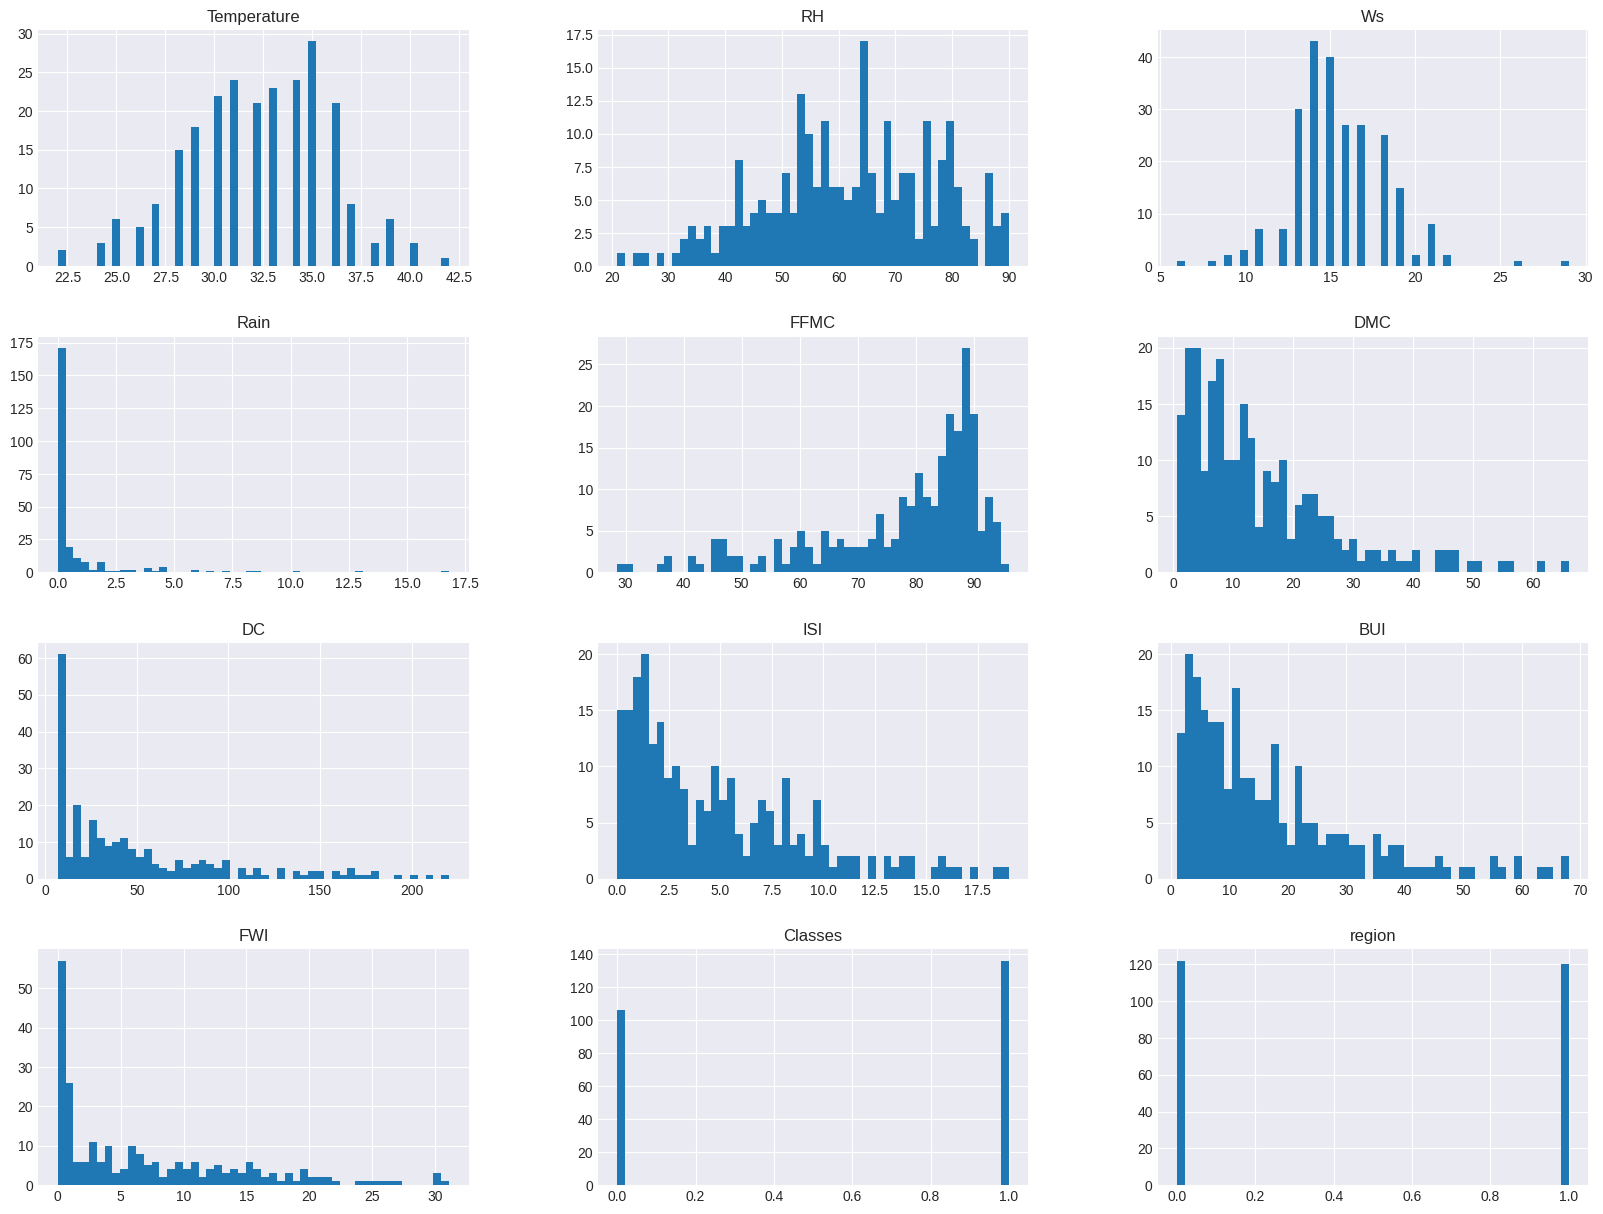

In [ ]:
##plot density plot for all features
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-darkgrid')
df1.hist(bins=50,figsize=(20,15))
plt.show()

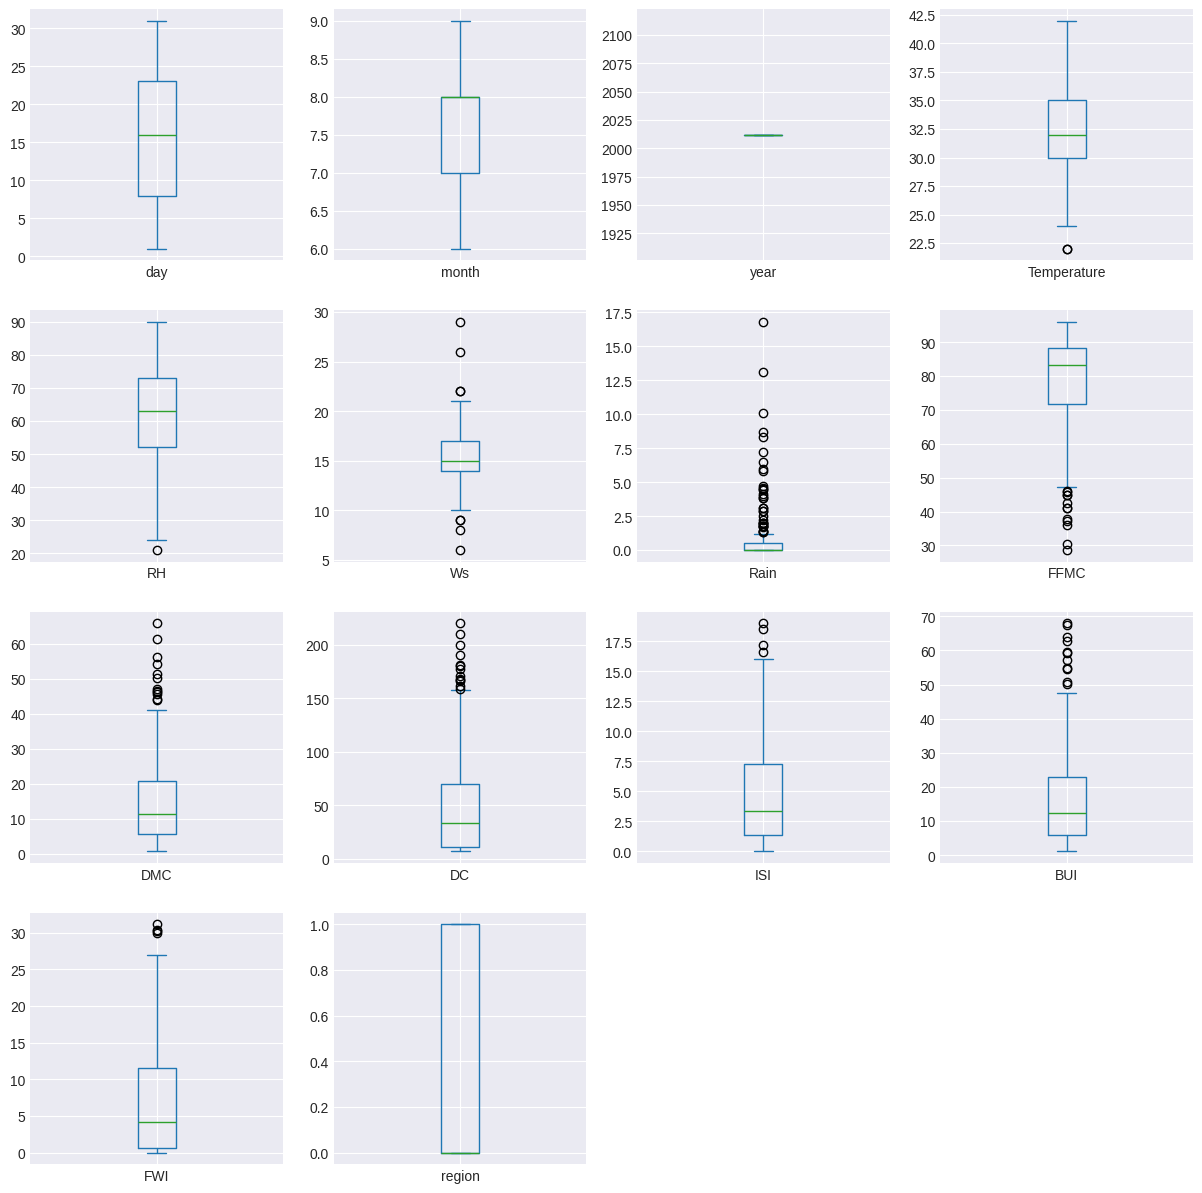

In [ ]:
plt.style.use('seaborn-v0_8-darkgrid')#it is a style we can use many type of
df.plot(kind='box',subplots=True,layout=(4,4),figsize=(15,15))
plt.show()

In [ ]:
#df.plot(kind='your_plot_type',subplots=True,layout=(rows,cols),figsize=(w,h))
#plt.show()
#for categorical values we need to use bar plots
#to plot all types of graphs in a single figure

Temperature


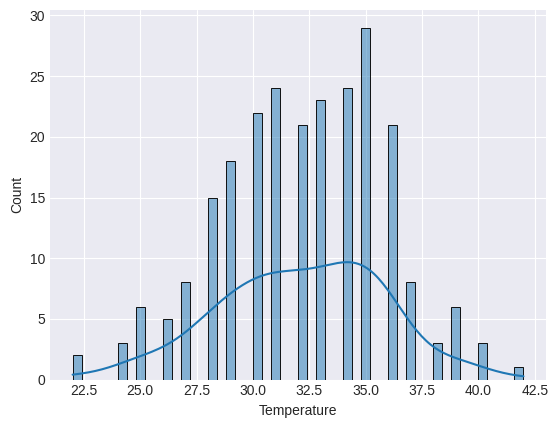

RH


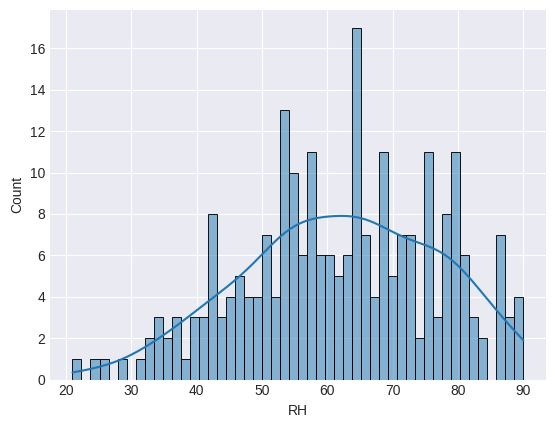

Ws


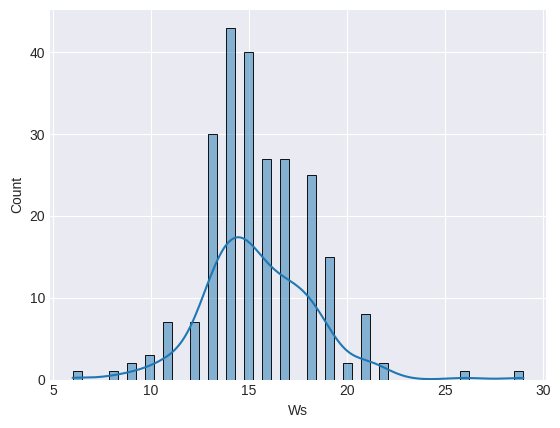

Rain


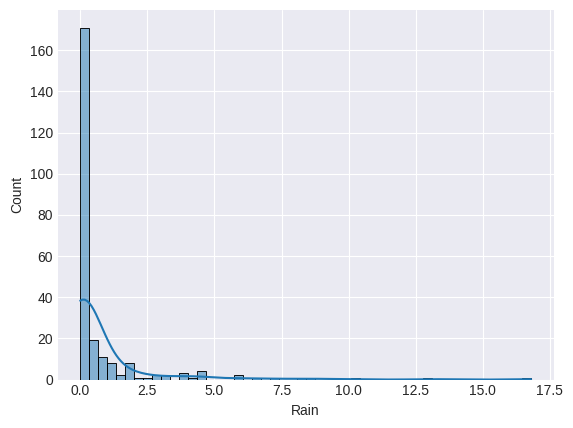

FFMC


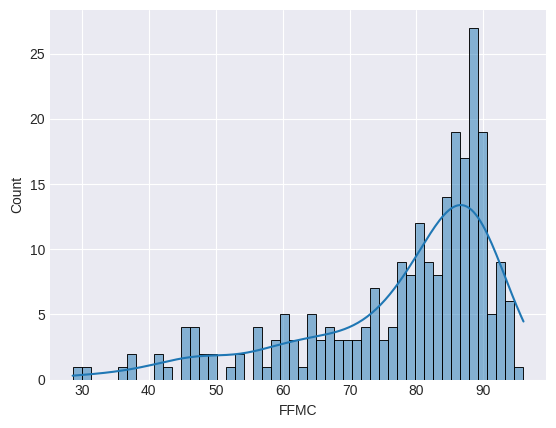

DMC


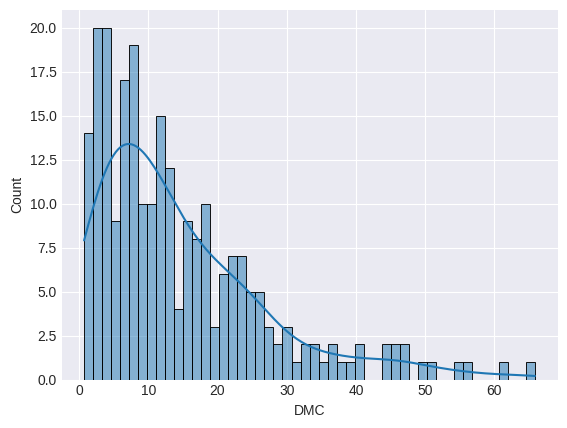

DC


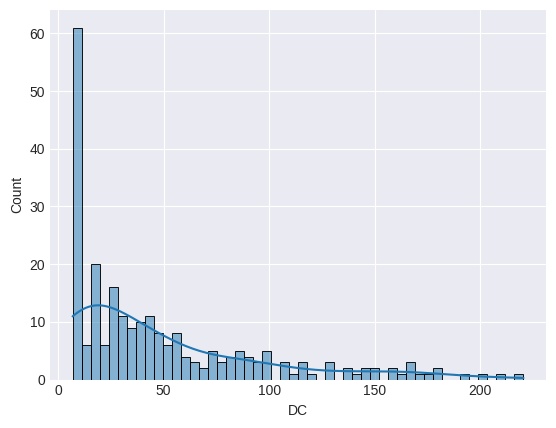

ISI


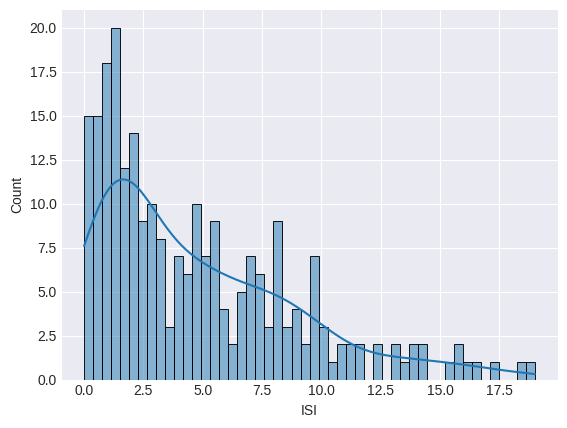

BUI


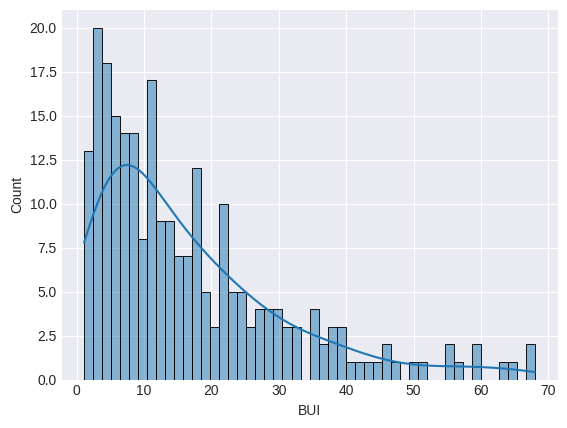

FWI


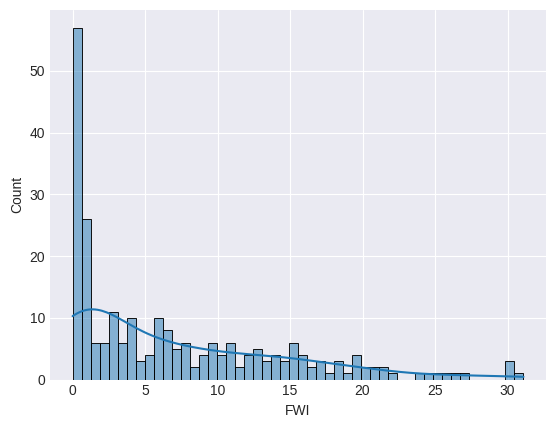

Classes


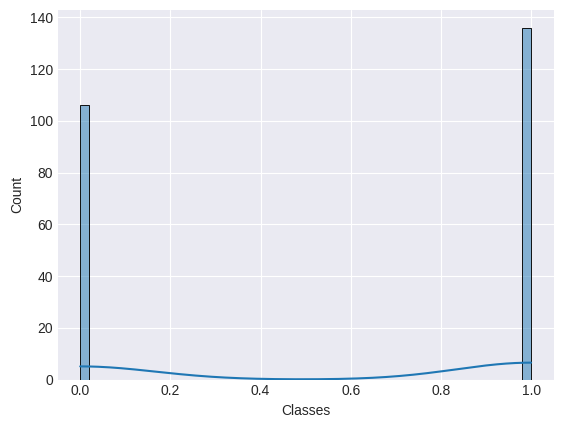

region


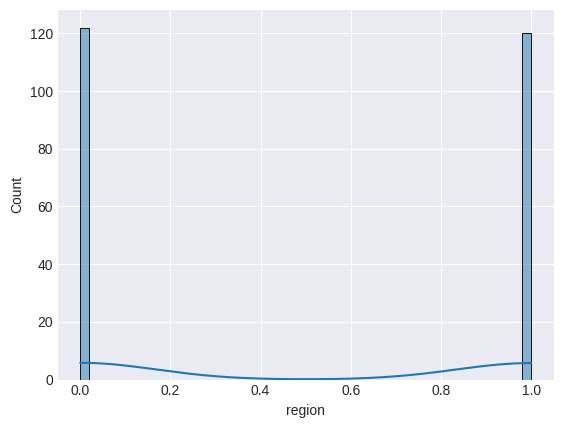

In [ ]:
for col in df1.columns:
  print(col)
  sns.histplot(df1[col],bins=50,kde=True)
  plt.show()

In [ ]:
percentage=df1['Classes'].value_counts(normalize=True)*100

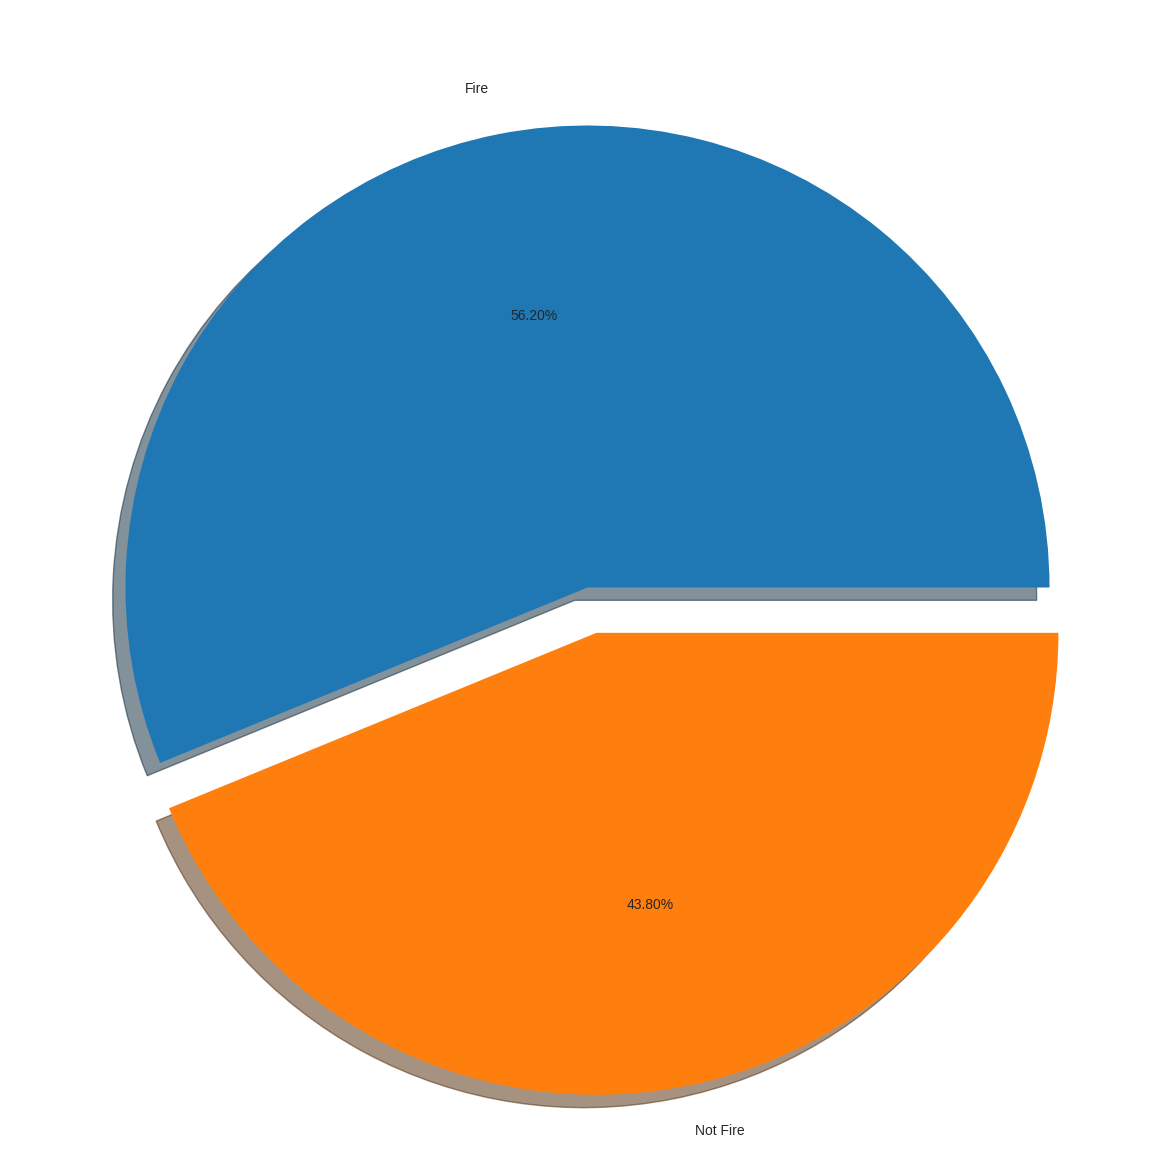

In [ ]:
##ploting pie chart
classlabels=['Fire','Not Fire']
plt.figure(figsize=(15,15))
plt.pie(percentage,labels=classlabels,autopct='%1.2f%%',shadow=True,explode=[0,0.1])
plt.show()

In [ ]:
#plt.pie(values,labels,autopct,explode,shadow)
#explode means the it creates a gap between those labels

In [ ]:
#multicollinearity means the features in the dataframe are correlated to each other not to the output feature
##df[[col1,col2]].corr()

In [ ]:
df1.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
Temperature,1.000000,-0.652383,-0.284032,-0.327161,0.677624,0.486437,0.376002,0.603984,0.460148,0.566837,0.518109,0.271499
RH,-0.652383,1.000000,0.242055,0.225594,-0.650586,-0.412590,-0.225925,-0.689471,-0.356378,-0.583591,-0.439837,-0.411120
Ws,-0.284032,0.242055,1.000000,0.172507,-0.167754,-0.001569,0.079963,0.008559,0.031067,0.032308,-0.072073,-0.183880
Rain,-0.327161,0.225594,0.172507,1.000000,-0.543579,-0.288345,-0.298727,-0.347605,-0.299682,-0.324464,-0.378429,-0.038521
FFMC,0.677624,-0.650586,-0.167754,-0.543579,1.000000,0.603326,0.508407,0.740357,0.591974,0.691374,0.769376,0.220871
DMC,0.486437,-0.412590,-0.001569,-0.288345,0.603326,1.000000,0.876943,0.680675,0.982329,0.876074,0.585383,0.190961
DC,0.376002,-0.225925,0.079963,-0.298727,0.508407,0.876943,1.000000,0.508753,0.942530,0.739753,0.513317,-0.077490
ISI,0.603984,-0.689471,0.008559,-0.347605,0.740357,0.680675,0.508753,1.000000,0.644142,0.922899,0.736413,0.263790
BUI,0.460148,-0.356378,0.031067,-0.299682,0.591974,0.982329,0.942530,0.644142,1.000000,0.858005,0.586974,0.088866
FWI,0.566837,-0.583591,0.032308,-0.324464,0.691374,0.876074,0.739753,0.922899,0.858005,1.000000,0.720241,0.197367


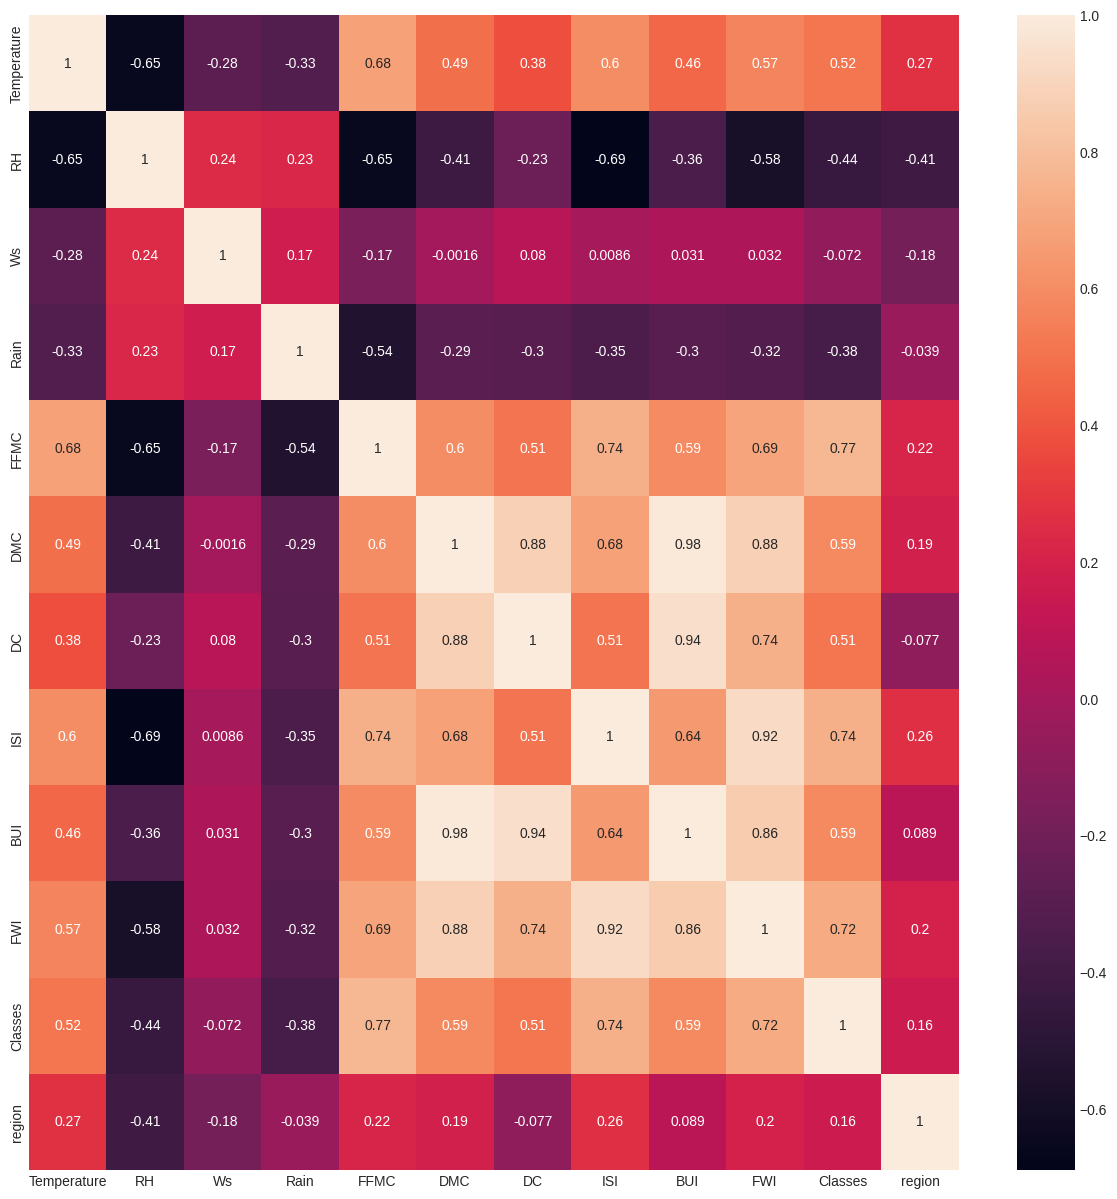

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(df1.corr(),annot=True)
plt.show()

<Axes: ylabel='FWI'>

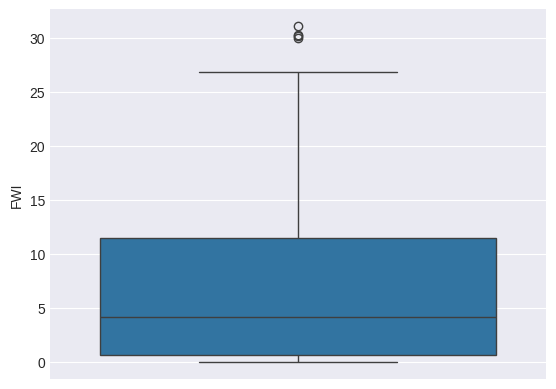

In [ ]:
##box plots
sns.boxplot(df1['FWI'])

In [ ]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1.0
238,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1.0
239,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1.0
240,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0


In [ ]:
# ✅ What is df.loc[]?
# .loc[] is used for label-based indexing — it selects rows/columns by their *names (labels)*, not by position.

# ✅ Example:
# df.loc['row_label', 'column_label']

# ✅ What if we use a condition inside .loc[]?
# This is valid — and still label-based!

# For example:
# dftemp = df.loc[df['Region'] == 1]

# Here's what's happening step-by-step:

# 1️⃣ df['Region'] == 1
#    - This creates a Boolean Series (True/False) based on the condition
#    - It checks each row's 'Region' value

# 2️⃣ The result looks like:
#       a     True
#       b    False
#       c     True
#       d    False
#    - These are the index *labels* of the rows where the condition is checked

# 3️⃣ df.loc[...]
#    - Takes that Boolean Series and selects *only the rows where it's True*
#    - Since the True/False index is based on *labels, .loc still works on **label-based indexing*

# ✅ Final result:
#    - dftemp contains only rows where Region == 1
#    - This is still label-based filtering, not position-based

# 🧠 Remember:
# .loc[] = label-based
# .iloc[] = integer position-based
# df['column'] == value → returns Boolean mask with index labels
# So df.loc[condition] = label-based filtering using condition

In [ ]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),'not fire','fire')

In [ ]:
df['region']

,region
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
237,1.0
238,1.0
239,1.0
240,1.0


In [ ]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

In [ ]:
#dftemp=df.loc[df['region]==1]

/tmp/ipython-input-2185327527.py:4: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:skyblue'` for the same effect.

  sns.countplot(x='month',hue='Classes',data=dftemp,color='skyblue')


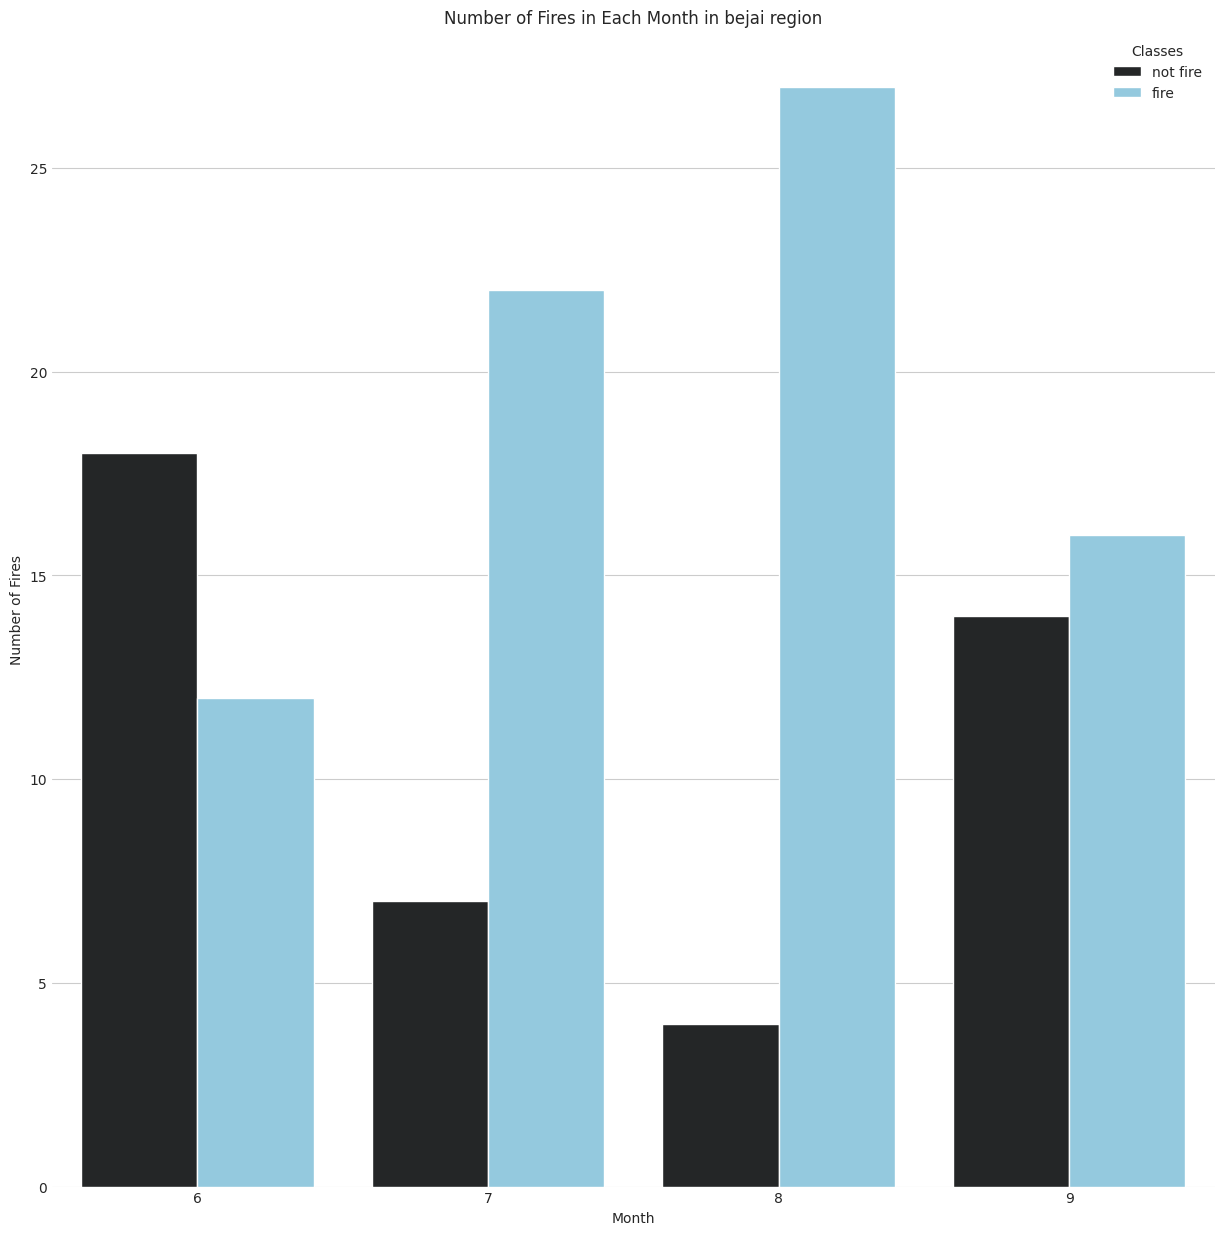

In [ ]:
dftemp=df[df['region']==1]
plt.figure(figsize=(15,15))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=dftemp,color='skyblue')
plt.ylabel('Number of Fires')
plt.xlabel('Month')
plt.title('Number of Fires in Each Month in bejai region')
plt.show()

/tmp/ipython-input-2687232405.py:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:skyblue'` for the same effect.

  sns.countplot(x='Classes',hue='region',data=df,color='skyblue')


<Axes: xlabel='Classes', ylabel='count'>

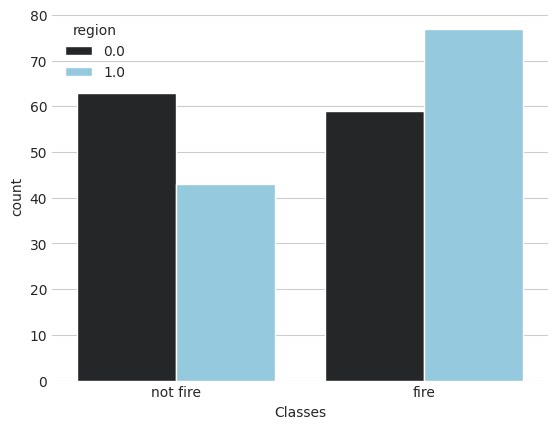

In [ ]:
sns.countplot(x='Classes',hue='region',data=df,color='skyblue')

# Feature selection

In [ ]:
ds=pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [ ]:
ds['Classes']=np.where(ds['Classes'].str.contains('not fire'),0,1)

In [ ]:
ds.isnull().sum()

,0
day,0
month,0
year,0
Temperature,0
RH,0
Ws,0
Rain,0
FFMC,0
DMC,0
DC,0


In [ ]:
ds.iloc[121:126]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
121,30,9,2012,25,78,14,1.4,45.0,1.9,7.5,0.2,2.4,0.1,0,0
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,0,1
123,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,0,1
124,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,0,1
125,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,0,1


In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    int64  
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(8)
memory usage: 28.6 KB


In [ ]:
ds[['day','month','year','FWI']].corr()

,day,month,year,FWI
day,1.000000,-0.000369,NaN,0.350781
month,-0.000369,1.000000,NaN,0.082639
year,NaN,NaN,NaN,NaN
FWI,0.350781,0.082639,NaN,1.000000


In [ ]:
#i think we can keep day but sir is telling to remove it cause when you remove year and month no use of day
ds.drop(['day','month','year'],axis=1,inplace=True)

In [ ]:
ds

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


In [ ]:
ds.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [ ]:
ds[~ds.isnull().any(axis=1)]

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


In [ ]:
#independent and dependednt features
x=ds.drop('FWI',axis=1)
y=ds['FWI']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train.shape

(194, 11)

In [ ]:
x_test.shape

(49, 11)

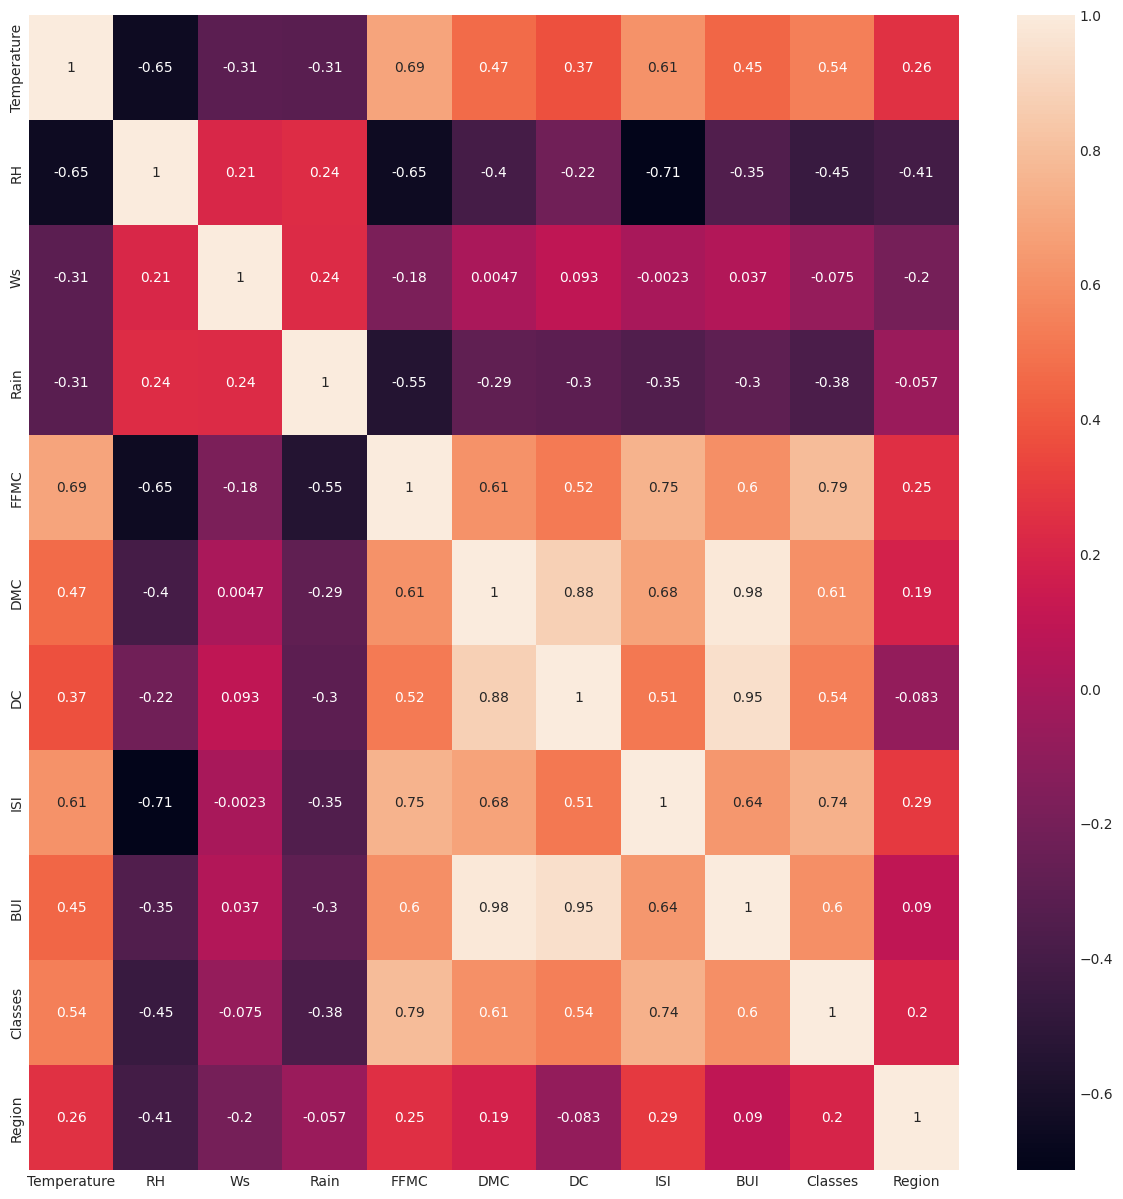

In [ ]:
##feature selection based on correlation
##check for multicollinearity is there any independent features correlated with eachother
plt.figure(figsize=(15,15))
corr=x_train.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [ ]:
##threshold is decided by domain expert

In [ ]:
def correlation(dataset,threshold):
  col_corr=set()
  corr_matrix=dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j])>threshold:
        colname=corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

In [ ]:
corr_features=correlation(x_train,0.85)

In [ ]:
x_train.drop(corr_features,axis=1,inplace=True)
x_test.drop(corr_features,axis=1,inplace=True)

In [ ]:
#feature scaling or standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_trains=scaler.fit_transform(x_train)
x_tests=scaler.transform(x_test)

In [ ]:
x_train.shape

(194, 9)

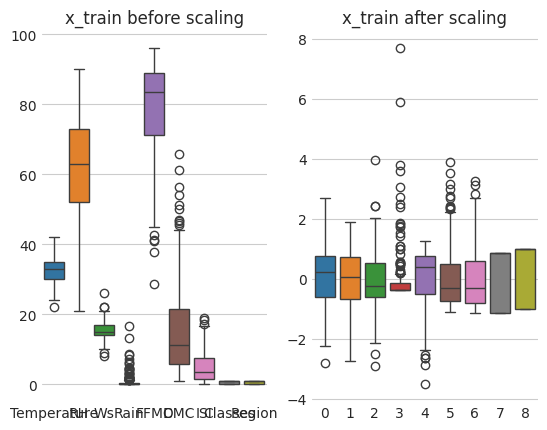

In [ ]:
plt.subplot(1,2,1)
sns.boxplot(data=x_train)
plt.title('x_train before scaling')
plt.subplot(1,2,2)
sns.boxplot(data=x_trains)
plt.title('x_train after scaling')
plt.show()

# Model training

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_trains,y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
y_pred=model.predict(x_tests)
r2_score_test=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
print('r2_score',r2_score_test)
print('testing mae',mae)
print(' testing mse',mse)

r2_score 0.9805895859259882
testing mae 0.5049978694165687
 testing mse 0.5882990110708693


In [ ]:
#training loss
y_pred_train=model.predict(x_trains)
r2_score_train=r2_score(y_train,y_pred_train)
mae_train=mean_absolute_error(y_train,y_pred_train)
mse_train=mean_squared_error(y_train,y_pred_train)

print('training r2_score',r2_score_train)
print('training mae',mae_train)
print('training mse',mse_train)

training r2_score 0.9716397291602472
training mae 0.7399061305412504
training mse 1.720636869750728


# Lasso regression

In [ ]:
# 📌 LassoCV / RidgeCV with Multiple Lambda (Alpha) Values – Full Explanation

# ✅ What is happening?
# When we use LassoCV or RidgeCV with multiple lambda values and k-fold CV:
# It finds the best alpha by training and validating models over multiple folds and lambdas.

# 👉 Example setup:
# alphas = [0.01, 0.1, 1, 10]
# cv = 5 (i.e., 5-Fold Cross-Validation)

# ✅ Step-by-Step Workflow:
# For each alpha in [0.01, 0.1, 1, 10]:
#     - The dataset is split into 5 folds.
#     - For each fold:
#         - 4 folds are used as training data
#         - 1 fold is used as validation data
#         - Model is trained on training data using current alpha
#         - Validation loss (e.g., MSE) is calculated on the validation fold
#     - The average validation error across 5 folds is computed for that alpha.

# ✅ After trying all alphas:
# The alpha with the *lowest average validation error* is selected as the best.
# You can access it using .alpha_ property:
#     lasso_cv.alpha_  or  ridge_cv.alpha_

# ✅ Summary Table Example:

# | Alpha | Fold1 | Fold2 | Fold3 | Fold4 | Fold5 | Avg Error |
# |-------|-------|-------|-------|-------|-------|------------|
# | 0.01  | 5.1   | 5.2   | 5.3   | 5.0   | 5.2   | 5.16       |
# | 0.1   | 4.9   | 4.8   | 5.0   | 5.1   | 4.9   | 4.94 ✅ Best |
# | 1     | 5.5   | 5.6   | 5.4   | 5.7   | 5.5   | 5.54       |
# | 10    | 6.2   | 6.3   | 6.1   | 6.0   | 6.4   | 6.20       |

# ✅ After best alpha is found:
# You can use it to train your final model:

# final_model = Lasso(alpha=lasso_cv.alpha_)
# final_model.fit(X_train_scaled, y_train)

# ✅ Why do we retrain after LassoCV/RidgeCV?
# - Because LassoCV internally splits data into folds during training.
# - Retraining on the full dataset with best alpha gives a cleaner final model.

# ✅ When we don't specify alpha manually (i.e., Ridge() or Lasso()):
# - Default alpha = 1.0 is used.
# - This may not be optimal — can lead to underfitting or overfitting.
# - So it's best to use RidgeCV or LassoCV to find a suitable alpha automatically.

# ✅ Final Summary:
# - Use LassoCV or RidgeCV for automatic hyperparameter tuning.
# - Internally, it does k-fold CV for each alpha and selects the best one.
# - Use the best alpha to train the final model.
# - Helps reduce overfitting, improves generalization, and automates lambda selection.

# 🚀 You’re now fully ready to use Ridge and Lasso with cross-validation like a pro!

In [ ]:
# 📌 Internal Workflow of LassoCV – How It Works Step-by-Step

# ✅ Goal:
# LassoCV tries multiple lambda (alpha) values, uses cross-validation,
# and selects the alpha that minimizes validation error (e.g., MSE).

# ✅ Let's say:
# alphas = [0.01, 0.1, 1, 10]
# cv = 5  (5-fold cross-validation)

# 🔁 For each alpha in the list:
#     - The dataset is split into 5 folds
#     - For each fold:
#         ➤ 4 folds used as training data
#         ➤ 1 fold used as validation data

#     - On training data:
#         ✅ Initialize theta (coefficients), often to zero or small values
#         ✅ Train the model using gradient descent or coordinate descent
#            Objective: Minimize ➤ Loss = MSE + alpha * sum(abs(theta))
#         ✅ This L1 regularization forces some theta values to become exactly zero
#         ✅ After training, use the learned theta to compute validation loss (e.g., MSE)

#     - Compute average validation error across all 5 folds for this alpha

# 🔁 Repeat this process for each alpha in [0.01, 0.1, 1, 10]

# ✅ After all alphas are tested:
#     - Select the alpha with the *lowest average validation error*
#     - This is stored in:  lasso_cv.alpha_

# ✅ Finally, we retrain the Lasso model using the *best alpha* on full training data:
#     final_model = Lasso(alpha=lasso_cv.alpha_)
#     final_model.fit(X_train_scaled, y_train)

# 🧠 Key Takeaways:
# - Theta (coefficients) are learned using optimization for each fold and alpha
# - Each alpha value goes through its own full CV process
# - LassoCV selects the best alpha that generalizes well (not just fits training)
# - Final model is trained using the best alpha after CV

# ✅ This ensures both good feature selection and generalization — all automated!

In [ ]:
# 📌 Lasso Regression with L1 Regularization

# ✅ Lasso adds L1 penalty to the loss:
#     Loss = MSE + α * Σ|θⱼ|
#   → This penalty encourages *sparsity*
#   → Some coefficients (slopes) become *exactly zero*
#   → Effectively, Lasso performs *automatic feature selection*

# ✅ Using LassoCV:
#     - LassoCV performs cross-validation to select the best alpha (regularization strength)
#     - After selecting alpha, it automatically *refits the model on the full training data*
#     - So, you can directly use this model to make predictions:
#         → y_pred = lasso.predict(X_test)
#     - No manual retraining is required after this step.

# ✅ Feature Selection with Lasso:
#     - You can access the selected features using:
#         selected_features = X_train.columns[lasso.coef_ != 0]
#     - Features with zero coefficients are considered unimportant

# 🔁 Optional Retraining (Only If You Want):
#     - After identifying selected features:
#         → Create a reduced dataset with only those features
#         → Retrain another model like Linear Regression or Ridge on this reduced dataset
#     - This is helpful if:
#         → You want to interpret the results better
#         → You want a simpler final model
#         → You want to use a model without regularization

# 🧠 When to Retrain vs Not Retrain?

# 🔹 Option 1: No Retraining (Most Common and Recommended)
#     ✅ Simpler workflow
#     ✅ LassoCV already does feature selection + training
#     ✅ Just use lasso.predict()

# 🔹 Option 2: Manual Retraining (Optional)
#     ✅ Use only selected features (non-zero slopes)
#     ✅ Apply another model (e.g., Linear Regression)
#     ✅ Can be more interpretable or efficient

# ✅ Final Recommendation:
#     - For most use cases: ✅ *Use LassoCV and directly predict*
#     - Only retrain if you specifically need a model without regularization or for interpretability

# 🧪 Example:
# from sklearn.linear_model import LassoCV
# lasso = LassoCV(cv=5)
# lasso.fit(X_train, y_train)
# y_pred = lasso.predict(X_test)  # Done! No retraining needed

In [ ]:
# 📌 Ridge Regression – Full Concept, Intuition & Theory

# ✅ What is Ridge Regression?
# Ridge Regression is a *regularized version of Linear Regression*.
# It adds a penalty term (L2 regularization) to the loss function to control large coefficients (slopes).

# 🔸 Ridge Loss Function:
#     Loss = MSE + λ * Σ(θⱼ²)
#         - MSE → Mean Squared Error on training data
#         - λ (lambda) → Regularization hyperparameter
#         - θⱼ² → Square of each coefficient (excluding the intercept)

# ✅ Why does Ridge focus on large slopes?
# When overfitting happens, the model:
#     - Tries to fit every point, even *outliers or noise*
#     - This causes it to *twist and bend excessively*, increasing slope magnitudes
#     - Especially in high-dimensional space, overfitting creates unstable and large weights

# ➤ Ridge acts as a warning:
#     “If you increase slope (theta) too much, I’ll penalize you!”

# ✅ Why is this important?
# Large slope values make the model *very sensitive to small changes* in input,
# leading to high variance and poor generalization on test data.

# ✅ Role of Lambda (λ):
#     - λ controls the *strength of penalty* applied to large coefficients
#     - If λ = 0 → Ridge behaves like plain Linear Regression (no penalty)
#     - If λ is very high → All coefficients shrink close to 0 → Model becomes too simple
#     - So λ is the *bias–variance tradeoff controller*

# ✅ When λ increases:
#     - Slopes decrease (more shrinkage)
#     - Model becomes more generalized
#     - But if λ is too large, it may hurt accuracy by underfitting

# ✅ Special Insight:
# Sometimes the *true pattern in the data* might naturally need large slopes.
# In that case, Ridge might reduce model performance by *shrinking those slopes unnecessarily*.
# This is why *cross-validation (like RidgeCV)* is used to find the *best λ*.

# ✅ Comparison with Lasso:
#     - Ridge: Shrinks coefficients but *never makes them exactly zero*
#         → It *keeps all features*
#     - Lasso: Can shrink some coefficients *exactly to zero*
#         → It *removes less important features* (feature selection)

# ✅ When to Use Ridge:
#     - When *all features are expected to be useful*
#     - When there’s *multicollinearity* (correlated input features)
#     - When you want to *reduce variance* but retain all features

# ✅ Scaling is Necessary:
# Ridge is *sensitive to feature scales*.
# Always use *StandardScaler* to normalize features before applying Ridge:
#     from sklearn.preprocessing import StandardScaler

# ✅ Final Summary:
# Ridge Regression controls overfitting by discouraging large slopes (theta values).
# It improves generalization but doesn’t perform feature selection.
# Use Ridge when you want to *stabilize* a model but still *keep all input features*.

# ✅ One-Liner Insight:
# Ridge Regression says:
#     “Don’t go wild with slopes — stay calm unless you really need to bend that line.”

In [ ]:
from sklearn.linear_model import LassoCV
lasso=LassoCV()
lasso.fit(x_trains,y_train)


LassoCV()

In [ ]:
#based on the dataset it will decide an alpha value
lasso.alpha_

np.float64(0.04391080246587261)

In [ ]:
lasso.alphas_

array([7.1563667 , 6.67405153, 6.2242428 , 5.80474966, 5.41352896,
       5.04867523, 4.70841142, 4.39108025, 4.09513613, 3.81913766,
       3.56174057, 3.32169117, 3.09782031, 2.88903759, 2.69432612,
       2.51273756, 2.34338746, 2.18545099, 2.0381589 , 1.90079382,
       1.77268667, 1.65321353, 1.54179247, 1.43788081, 1.34097246,
       1.2505954 , 1.16630946, 1.08770411, 1.01439649, 0.94602956,
       0.88227033, 0.82280827, 0.76735374, 0.71563667, 0.66740515,
       0.62242428, 0.58047497, 0.5413529 , 0.50486752, 0.47084114,
       0.43910802, 0.40951361, 0.38191377, 0.35617406, 0.33216912,
       0.30978203, 0.28890376, 0.26943261, 0.25127376, 0.23433875,
       0.2185451 , 0.20381589, 0.19007938, 0.17726867, 0.16532135,
       0.15417925, 0.14378808, 0.13409725, 0.12505954, 0.11663095,
       0.10877041, 0.10143965, 0.09460296, 0.08822703, 0.08228083,
       0.07673537, 0.07156367, 0.06674052, 0.06224243, 0.0580475 ,
       0.05413529, 0.05048675, 0.04708411, 0.0439108 , 0.04095

In [ ]:
#almost 500 we will get cause
lasso.mse_path_

array([[68.58934997, 64.28650232, 49.25415197, 79.11474083, 38.68688171],
       [63.2664675 , 58.77362304, 43.20292636, 77.07183352, 34.66910628],
       [56.87389457, 51.79652473, 37.15764773, 69.4806422 , 31.16497557],
       [51.2737596 , 45.69461734, 31.98560721, 62.80993539, 27.46286399],
       [45.36816855, 40.35928545, 27.56726322, 56.94442062, 23.75447628],
       [39.875005  , 35.69250404, 23.79907917, 50.31847875, 20.54655878],
       [35.0794232 , 31.60885664, 20.59132915, 44.35263414, 17.77349727],
       [30.89154006, 28.0342798 , 17.86626498, 39.14265375, 15.37720198],
       [27.23334321, 24.90389594, 15.55674604, 34.59116894, 13.30754905],
       [24.03652419, 22.16129069, 13.60451947, 30.61376519, 11.52101422],
       [21.24273995, 19.75730052, 11.95924131, 27.13693185,  9.97950732],
       [18.80004176, 17.64896267, 10.57738151, 24.09623192,  8.65087048],
       [16.66356323, 15.79916526,  9.42117661, 21.43679316,  7.50627555],
       [14.79422393, 14.17520895,  8.4

In [ ]:
lasso.coef_

array([ 0.        , -0.        ,  0.        , -0.        ,  0.        ,
        3.11343121,  4.04219354,  0.        , -0.        ])

0.6568370026125329
0.978328234520343


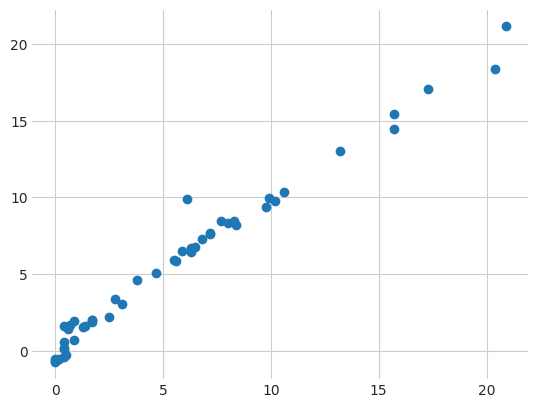

In [ ]:
#with best alpha value after LassoCV
y_pred=lasso.predict(x_tests)
plt.scatter(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
print(mse)
score=r2_score(y_test,y_pred)
print(score)

Mean absolute error 1.0093958923873407
R2 Score 0.9430507350726562


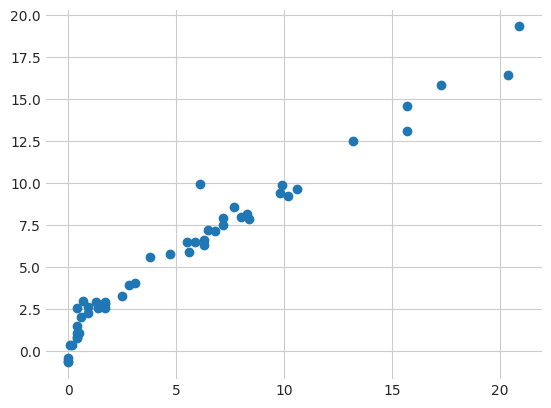

In [ ]:
#with default alpha value
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(x_trains,y_train)
y_pred=lasso.predict(x_tests)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

# Ridge regression

In [ ]:
#here cv it uses least one where it takes on point as validation datapoint
#here it will take only 3 alpha values

In [ ]:
from sklearn.linear_model import RidgeCV

In [ ]:
# ✅ Step 1: Linear Regression (No Regularization)
# - Train a simple Linear Regression model.
# - Perform K-Fold Cross Validation.
# - Calculate and record the average Mean Squared Error (MSE).
# - This serves as a baseline for comparison.

# ✅ Step 2: Lasso Regression with Cross Validation
# - Use LassoCV to automatically find the best alpha (λ) value.
# - This alpha controls the regularization strength.
# - Lasso helps in feature selection by reducing some coefficients to zero.
# - Train the Lasso model with the best alpha.
# - Compute the average MSE using the same cross-validation strategy.

# ✅ Step 3: Ridge Regression with Cross Validation
# - Use RidgeCV to find the optimal alpha (λ).
# - Ridge does not eliminate features but shrinks large coefficients to reduce multicollinearity.
# - Train the Ridge model with the best alpha.
# - Again, calculate average MSE using the same cross-validation strategy.

# ✅ Step 4: Model Comparison
# - Compare the average MSE values of Linear, Lasso, and Ridge regression.
# - Choose the model with the lowest validation MSE (best generalization).
# - If multicollinearity or irrelevant features exist, Lasso or Ridge often performs better than plain Linear Regression.

# ✅ Best Practice:
# - Use the same KFold splitter (with same random_state) for all models to ensure a fair and consistent comparison.
# - Optionally record training and validation scores separately to monitor overfitting.

# ✅ Final Decision:
# - Select the model (Linear, Lasso, or Ridge) with the lowest average validation error.
# - This is your best-fit regression model for the dataset.

In [ ]:
ridge=RidgeCV(cv=5)
ridge.fit(x_trains,y_train)

RidgeCV(cv=5)

0.841986797932755
0.9722193780965623


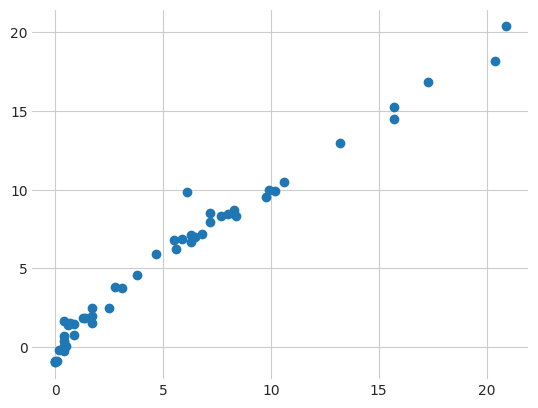

In [ ]:
y_pred=ridge.predict(x_tests)
plt.scatter(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
print(mse)
score=r2_score(y_test,y_pred)
print(score)

In [ ]:
ridge.alpha_

np.float64(10.0)

In [ ]:
ridge.alphas

(0.1, 1.0, 10.0)

Mean absolute error 0.5192048325844797
R2 Score 0.9801058063273599


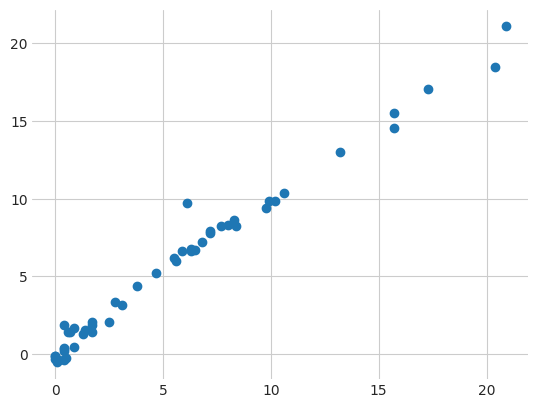

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Ridge()
lasso.fit(x_trains,y_train)
y_pred=lasso.predict(x_tests)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

# Elasticnet CV

Mean absolute error 1.6834416340136709
R2 Score 0.8676961352267807


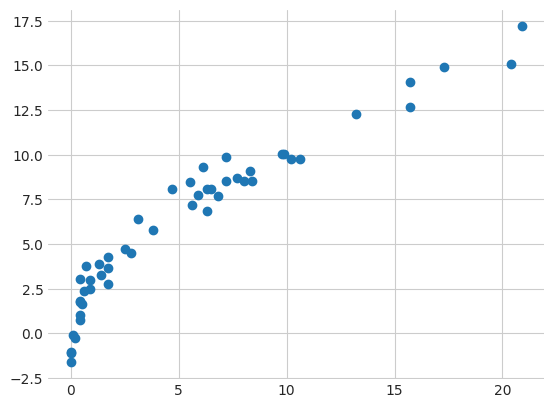

In [ ]:
#without best alpha value
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic=ElasticNet()
elastic.fit(x_trains,y_train)
y_pred=elastic.predict(x_tests)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

In [ ]:
#it will have something l1_ration where it means it will focus 50percent on one norm and one more 50 on l2 norm

Mean absolute error 0.5710147088777218
R2 Score 0.9781014571778188


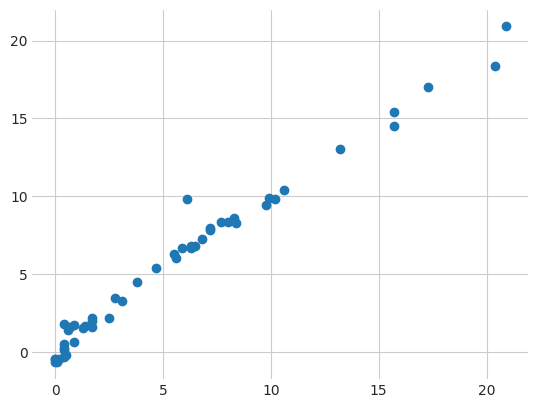

In [ ]:
#with best alpha value
from sklearn.linear_model import ElasticNetCV
elasticcv=ElasticNetCV(cv=5)
elasticcv.fit(x_trains,y_train)
y_pred=elasticcv.predict(x_tests)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Let's plot the predicted values against the actual values to visualize the model's performance.

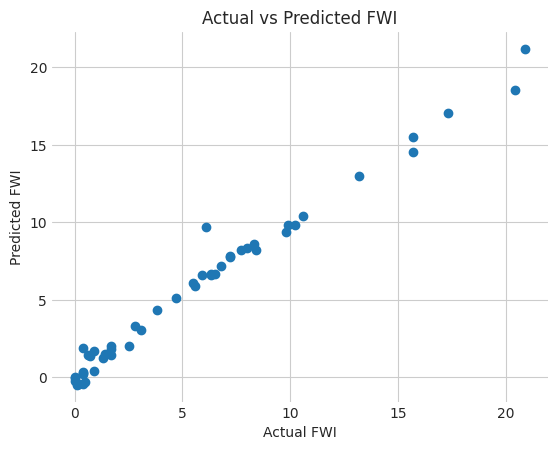

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual FWI")
plt.ylabel("Predicted FWI")
plt.title("Actual vs Predicted FWI")
plt.show()